In [29]:
import os

current_directory = os.getcwd()
print("Current Directory:", current_directory)


Current Directory: /drive/notebooks


In [30]:
import zipfile
import os

# Unzip the uploaded file
zip_path = "/drive/notebooks/bank+marketing.zip"
extract_dir = "/drive/notebooks/bank_marketing_data"

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List extracted files
os.listdir(extract_dir)


['__MACOSX',
 'bank-additional',
 'bank-additional.zip',
 'bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank.zip']

In [31]:
# Let's extract the contents of 'bank.zip' and 'bank-additional.zip' as well
bank_zip_path = os.path.join(extract_dir, 'bank.zip')
bank_additional_zip_path = os.path.join(extract_dir, 'bank-additional.zip')

with zipfile.ZipFile(bank_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

with zipfile.ZipFile(bank_additional_zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# List files again to see the final contents
os.listdir(extract_dir)


['__MACOSX',
 'bank-additional',
 'bank-additional.zip',
 'bank-full.csv',
 'bank-names.txt',
 'bank.csv',
 'bank.zip']

In [32]:
# Let's load one of the datasets, starting with 'bank-full.csv'
import pandas as pd

bank_data_path = os.path.join(extract_dir, 'bank-full.csv')
df = pd.read_csv(bank_data_path, sep=';')

# Display the first few rows and dataset info
df.head(), df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 4.1+ MB


(   age           job  marital  education default  balance housing loan  \
 0   58    management  married   tertiary      no     2143     yes   no   
 1   44    technician   single  secondary      no       29     yes   no   
 2   33  entrepreneur  married  secondary      no        2     yes  yes   
 3   47   blue-collar  married    unknown      no     1506     yes   no   
 4   33       unknown   single    unknown      no        1      no   no   
 
    contact  day month  duration  campaign  pdays  previous poutcome   y  
 0  unknown    5   may       261         1     -1         0  unknown  no  
 1  unknown    5   may       151         1     -1         0  unknown  no  
 2  unknown    5   may        76         1     -1         0  unknown  no  
 3  unknown    5   may        92         1     -1         0  unknown  no  
 4  unknown    5   may       198         1     -1         0  unknown  no  ,
 None)

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Encode categorical variables
df_encoded = df.copy()
label_encoders = {}

for column in df_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df_encoded[column] = le.fit_transform(df_encoded[column])
    label_encoders[column] = le

# Define features and target
X = df_encoded.drop('y', axis=1)
y = df_encoded['y']

# Split into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predict on test set
y_pred = clf.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

accuracy, report, conf_matrix
#Accuracy: 87.4%
#[[7378  574]
 #[ 565  526]]



(0.8740462235983634,
 '              precision    recall  f1-score   support\n\n           0       0.93      0.93      0.93      7952\n           1       0.48      0.48      0.48      1091\n\n    accuracy                           0.87      9043\n   macro avg       0.70      0.70      0.70      9043\nweighted avg       0.87      0.87      0.87      9043\n',
 array([[7378,  574],
        [ 565,  526]], dtype=int64))

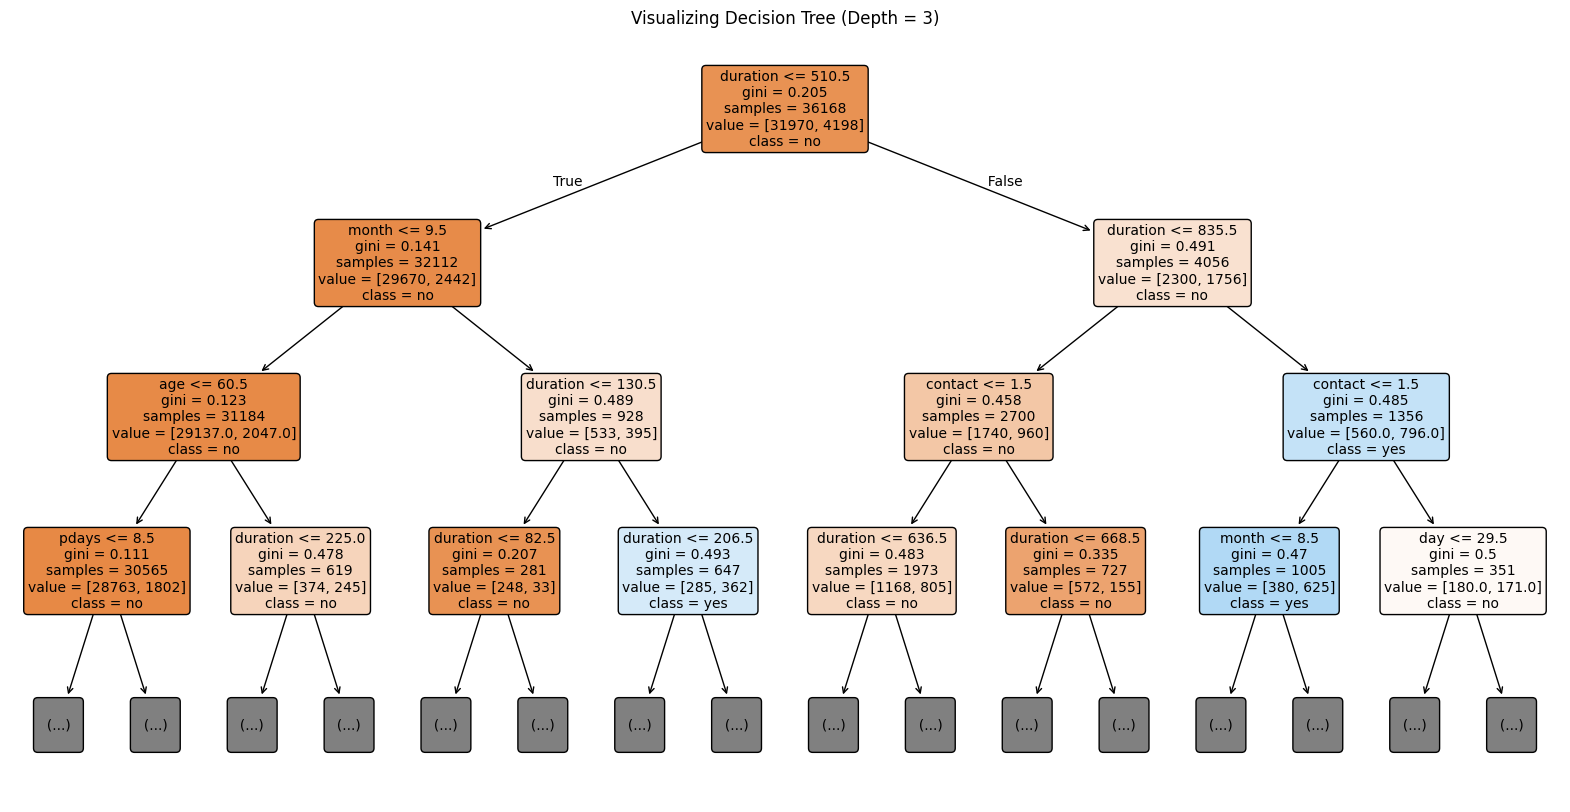

In [34]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Set figure size
plt.figure(figsize=(20, 10))

# Plot the decision tree
plot_tree(clf, feature_names=X.columns, class_names=label_encoders['y'].classes_, 
          filled=True, rounded=True, max_depth=3, fontsize=10)

plt.title("Visualizing Decision Tree (Depth = 3)")
plt.show()


In [36]:
# Get feature importances from the decision tree
importances = clf.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Display top 10 most important features
feature_importance_df.head(10)


,Feature,Importance
11,duration,0.294289
5,balance,0.110755
0,age,0.104776
10,month,0.103624
9,day,0.083587
13,pdays,0.054215
15,poutcome,0.049498
1,job,0.048486
12,campaign,0.034509
6,housing,0.024067


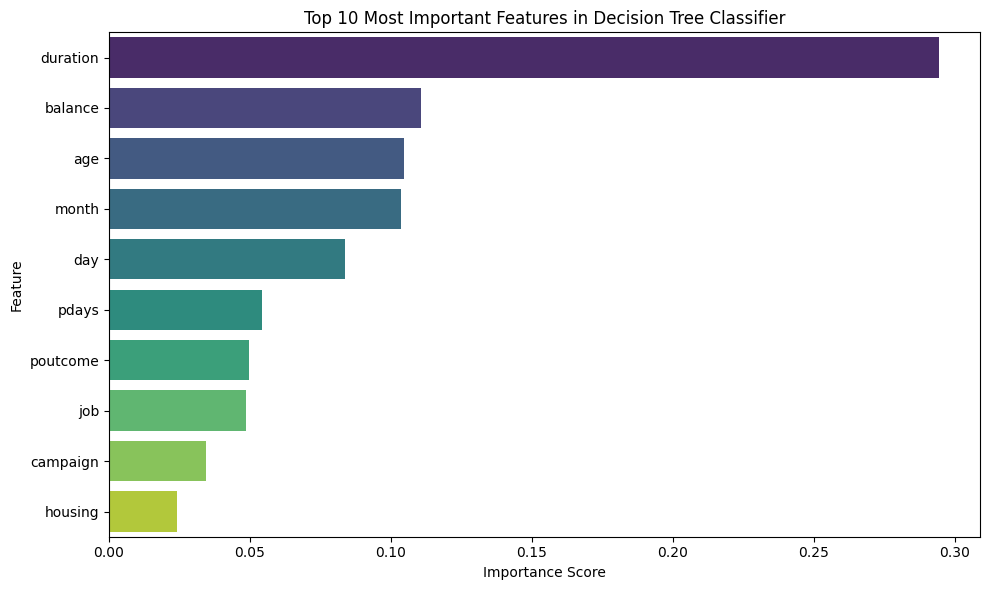

In [40]:
%pip install seaborn
import seaborn as sns

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(
    data=feature_importance_df.head(10),
    x='Importance',
    y='Feature',
    hue='Feature',
    palette='viridis'
)
plt.title('Top 10 Most Important Features in Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

